
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the [GitHub installation](https://github.com/Narayana-Rao/polsartools).

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




In [1]:

import polsartools as pst
import os
from osgeo import gdal
import matplotlib.pyplot as plt
import numpy as np



In [2]:

def read_rst(file):
    ds = gdal.Open(file)
    band = ds.GetRasterBand(1)
    arr = band.ReadAsArray()
    arr[arr==0] = np.nan
    return arr


def plot_images(*filenames, lower_percentile=2, upper_percentile=98, max_cols=4):
    # Function to compute vmin and vmax based on nanpercentiles
    def compute_vmin_vmax(data):
        data_no_nan = data[np.isfinite(data)]  # Remove NaNs
        vmin = np.percentile(data_no_nan, lower_percentile)
        vmax = np.percentile(data_no_nan, upper_percentile)
        return vmin, vmax
    
    # Number of images to plot
    num_images = len(filenames)

    # Calculate the number of rows and columns
    ncols = min(max_cols, num_images)  # Use max_cols but limit it to num_images
    nrows = np.ceil(num_images / ncols).astype(int)  # Calculate number of rows

    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten() 

    for i, filename in enumerate(filenames):
        data = read_rst(filename)  # Load the data from the file
        vmin, vmax = compute_vmin_vmax(data)
        ax = axes[i]
        im = ax.imshow(data, vmin=vmin, vmax=vmax)
        ax.set_title(os.path.basename(filename))
        fig.colorbar(im, ax=ax)

    # Turn off any unused axes
    for j in range(num_images, len(axes)):
        axes[j].axis('off')

    # Adjust layout
    plt.tight_layout()
    plt.show()

## Extract polarimetric C3/T3 matrix from UAVSAR GRD data
#### Provide path to the UAVSAR annotation file. Make sure that extracted data and ``*.ann`` file are in the same folder

The sample dataset used in this tutorial can be downloaded from the following URL with NASA-Earthdata credentials: 
https://uavsar.asf.alaska.edu/UA_winnip_31606_12049_004_120627_L090_CX_03/winnip_31606_12049_004_120627_L090_CX_03_grd.zip

In [3]:

annFile = r"./winnip_31606_12049_004_120627_L090_CX_03_grd/winnip_31606_12049_004_120627_L090_CX_03.ann"

#The follwoing function extracts C3 matrix from UAVSAR GRD data

pst.uavsar_grd(annFile)


Invalid matrix type. Defaulting to C3
C3 folder does not exist. 
Creating folder ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C11.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C33.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C22.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C12_real.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C12_imag.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C13_real.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C13_imag.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C23_real.bin
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3/C23_imag.bin
Extracted C3 files to ./winnip_31606_12049_004_120627_L090_CX_03_grd/C3
Execution time for uavsar_grd: 7.00 seconds


## Speckle filtering using polarimetric refined-Lee filter 

In [4]:
"""
The following function generates speckel filtered polarimetric matrices using refined lee polarimetric speckle filter: 
        
input C3/T3/C2/T2 folder path, window_size between 3-31  

"""

C3Folder = os.path.join(os.path.dirname(annFile),'C3')

pst.rlee(C3Folder,window_size=3)

Progress: 100%|██████████████████████████████████████████████████████████████████████| 260/260 [01:38<00:00,  2.63block/s]


Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C11.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C12_real.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C12_imag.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C13_real.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C13_imag.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C22.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C23_real.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C23_imag.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3\C3\C33.tif
Execution time for rlee: 02:46 (min:sec)


## Generate a pauliRGB

Pauli RGB image saved as ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\PauliRGB.png
Execution time for pauliRGB: 22.00 seconds


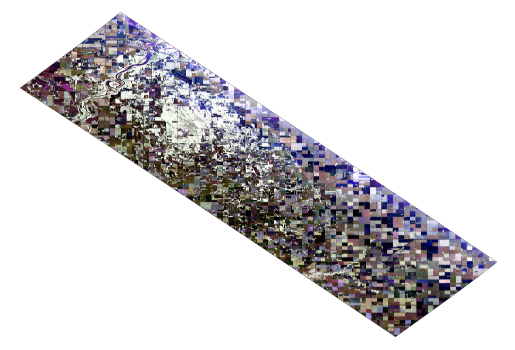

In [3]:
# update the C3 folder based on your folder
C3Folder = './winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3'
pst.pauliRGB(C3Folder)

## H/A/α Decomposition

Progress: 100%|██████████████████████████████████████████████████████████████████████| 260/260 [02:23<00:00,  1.81block/s]


Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\H_fp.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\alpha_fp.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\anisotropy_fp.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\e1_norm.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\e2_norm.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\e3_norm.tif
Execution time for halphafp: 03:07 (min:sec)


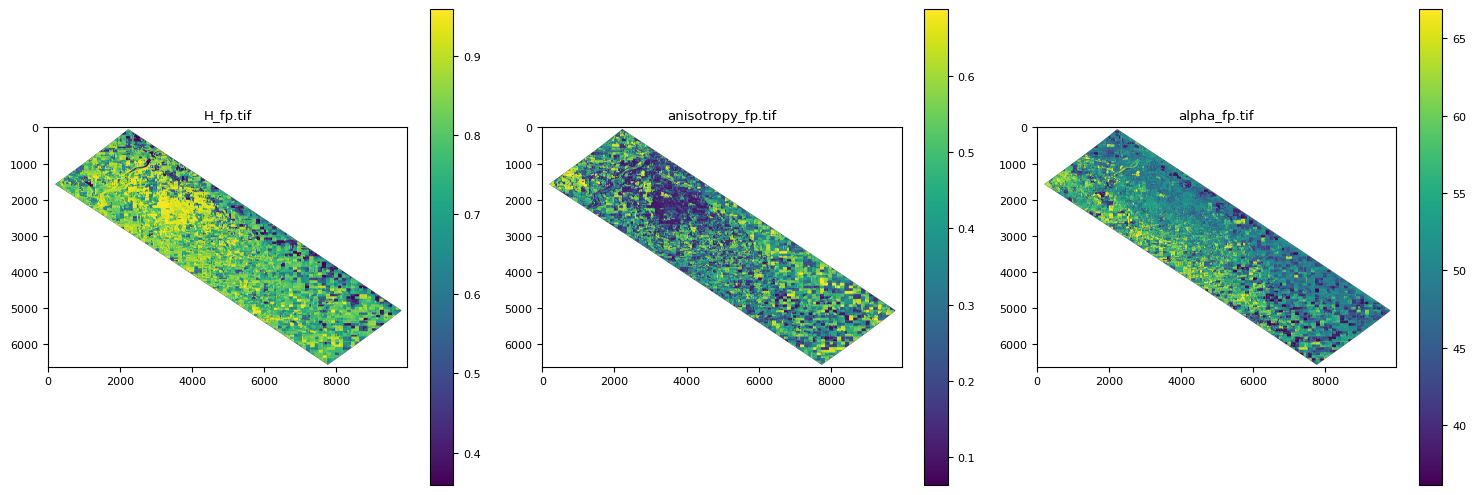

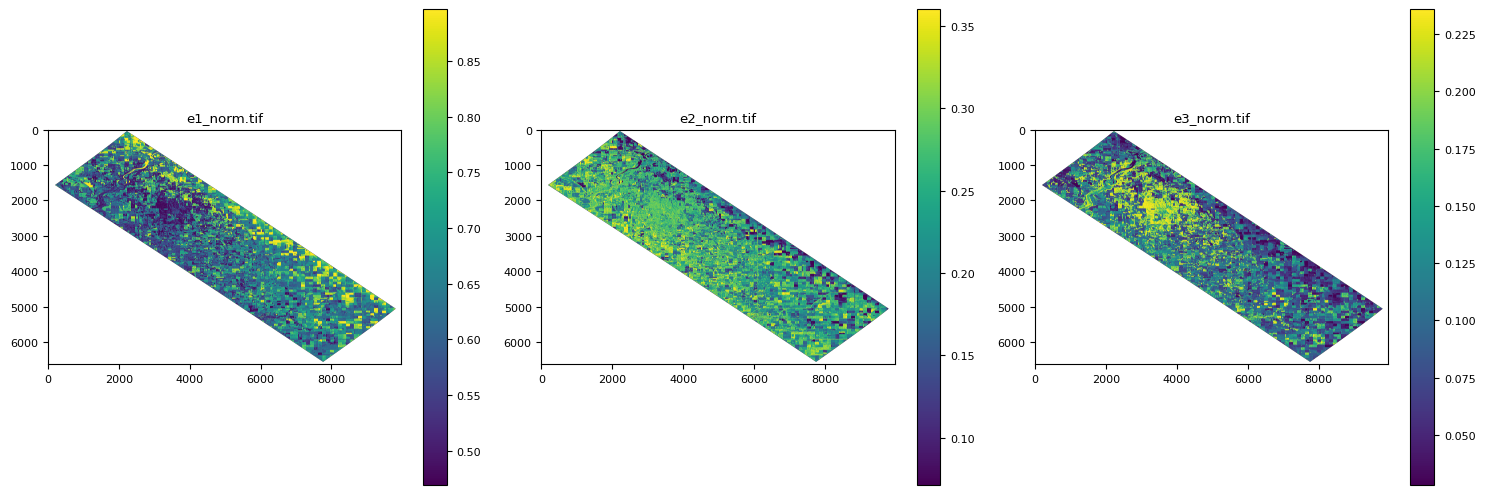

In [8]:

"""
The following function generates H/A/alpha demposition paramters: 
        Alpha, entropy, anisotropy and 
        normalized eigen values e1_norm, e2_norm, e3_norm in geotif format

input C3/T3 folder path, window_size is optional  

"""
# update the C3 folder based on your folder
# C3Folder = './winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3'

pst.halphafp(C3Folder,window_size=3) 


### Plotting
plot_images(os.path.join(C3Folder,'H_fp.tif'),
             os.path.join(C3Folder,'anisotropy_fp.tif'),
              os.path.join(C3Folder,'alpha_fp.tif'))

plot_images(os.path.join(C3Folder,'e1_norm.tif'),
             os.path.join(C3Folder,'e2_norm.tif'),
             os.path.join(C3Folder,'e3_norm.tif'))




### Plot Entropy-Alpha 2D plane

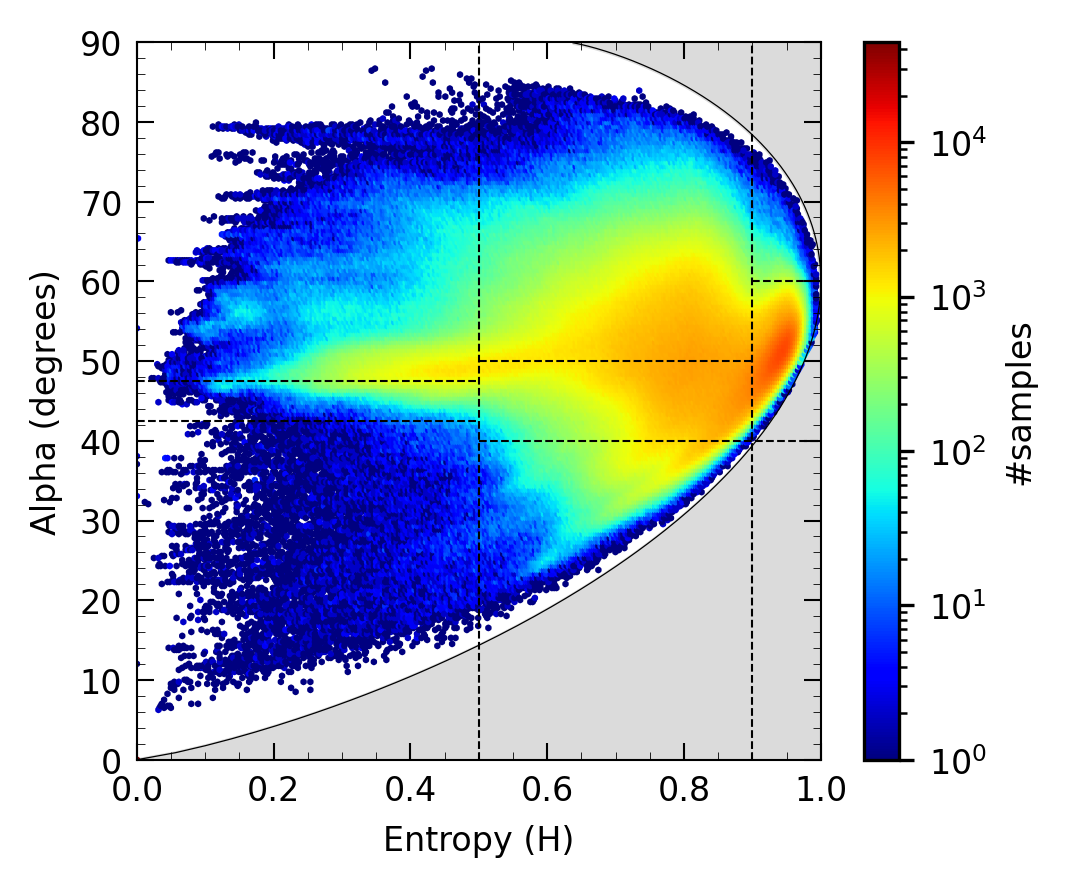

In [8]:
hFile = os.path.join(C3Folder,'H_fp.tif')
alphaFile = os.path.join(C3Folder,'alpha_fp.tif')
pst.halpha_plot_fp(hFile,alphaFile,cmap='jet',
                   norm='log',
                   path = '',# give a name.png to save the plot as png 
                  zone_lines=True,
                  zone_ids=False,
                  )

## Neumann Decomposition

Progress: 100%|██████████████████████████████████████████████████████████████████████| 260/260 [00:39<00:00,  6.60block/s]


Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\Neu_psi.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\Neu_delta_mod.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\Neu_delta_pha.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\Neu_tau.tif
Execution time for neufp: 01:17 (min:sec)


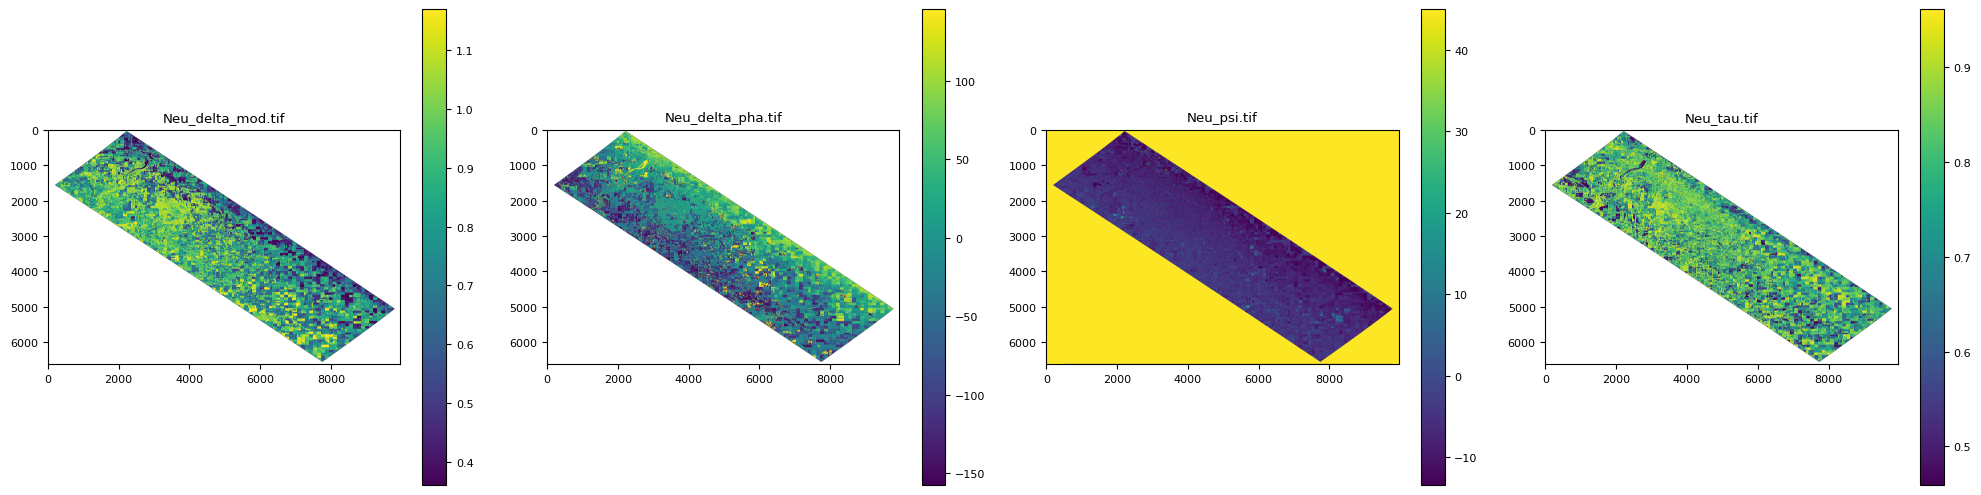

In [9]:
"""
The following function generates Nuemann demposition paramters: 
        Neu_psi, Neu_delta_mod, Neu_delta_pha, and Neu_tau in geotif format

input C3/T3 folder path, window_size is optional  

"""

# C3Folder = './winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3'

pst.neufp(C3Folder,window_size=3) 

### Plotting
plot_images( os.path.join(C3Folder,'Neu_delta_mod.tif'),
             os.path.join(C3Folder,'Neu_delta_pha.tif'),
             os.path.join(C3Folder,'Neu_psi.tif'),
             os.path.join(C3Folder,'Neu_tau.tif'),
                      )


## Non-negative eigen value decomposition (NNED )

Progress: 100%|██████████████████████████████████████████████████████████████████████| 260/260 [00:45<00:00,  5.73block/s]


Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\NNED_odd.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\NNED_dbl.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\NNED_vol.tif
Execution time for nnedfp: 01:08 (min:sec)


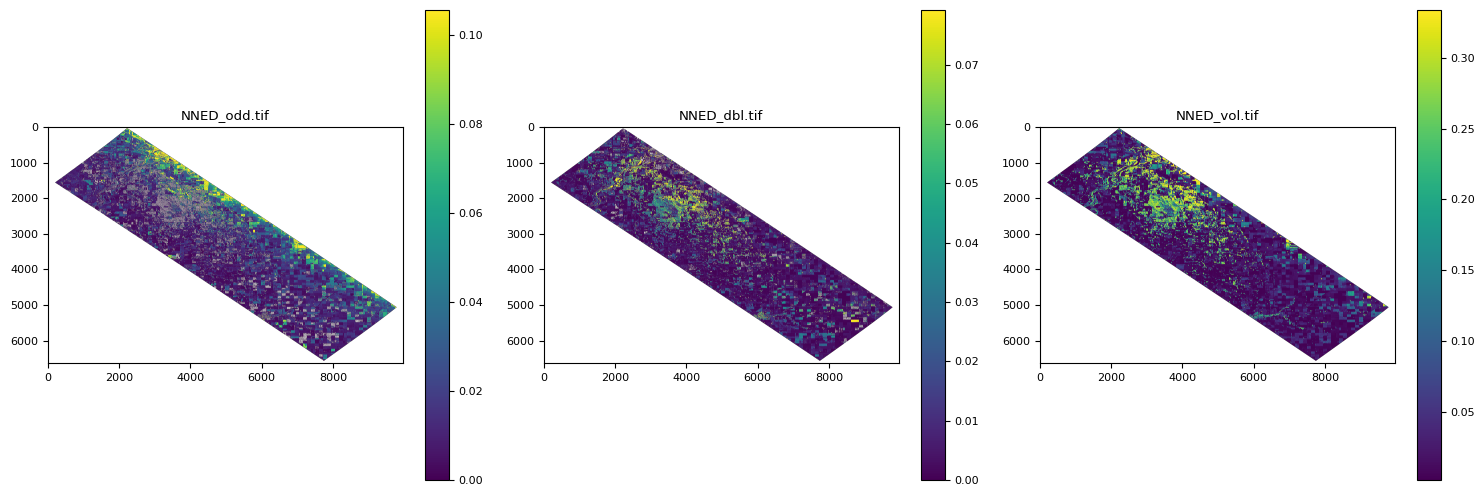

In [10]:
"""
The following function generates Non-negative eigen value decomposition demposition powers: 
        NNED_odd, NNED_dbl, NNED_vol in geotif format

input C3/T3 folder path, window_size is optional  

"""
# C3Folder = './winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3'

pst.nnedfp(C3Folder,window_size=3) 

### Plotting
plot_images(os.path.join(C3Folder,'NNED_odd.tif'),
             os.path.join(C3Folder,'NNED_dbl.tif'),
              os.path.join(C3Folder,'NNED_vol.tif'))

## Shannon Entropy Parameters

Progress: 100%|██████████████████████████████████████████████████████████████████████| 260/260 [01:33<00:00,  2.79block/s]


Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\H_Shannon.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\HI_Shannon.tif
Saved file ./winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3\HP_Shannon.tif
Execution time for shannon_h_fp: 01:53 (min:sec)


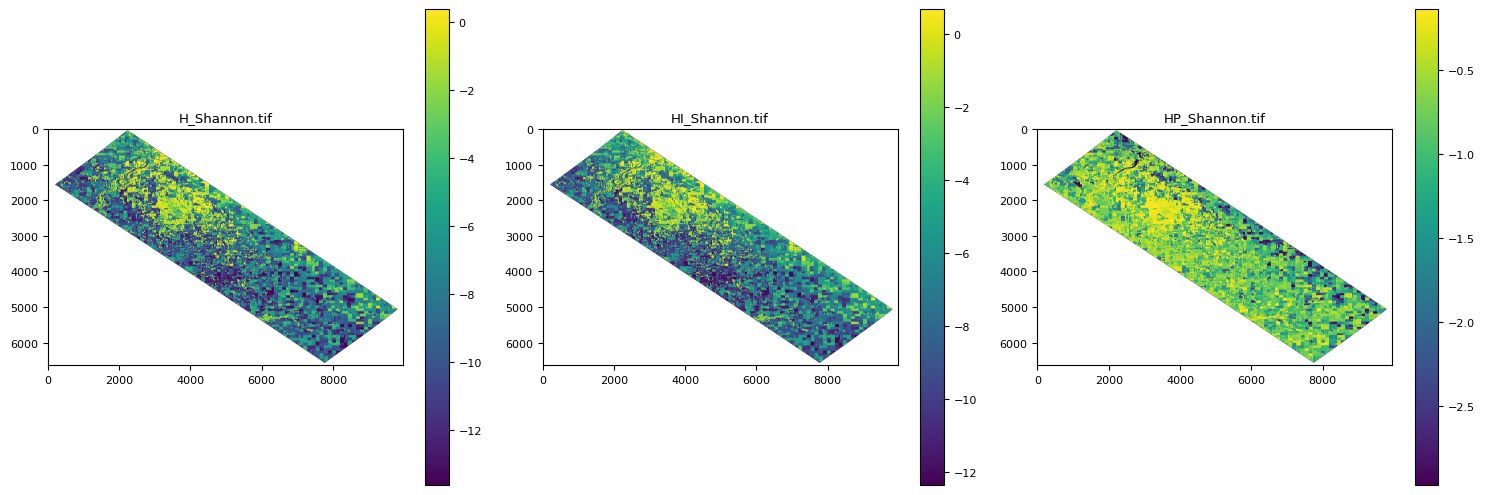

In [11]:

"""
The following function generates Shannon entropy parameters: 
        H_Shannon, HI_Shannon, and HP_Shannon in geotif format

input C3/T3 folder path, window_size is optional  

"""


# C3Folder = './winnip_31606_12049_004_120627_L090_CX_03_grd_rlee_3x3/C3'

pst.shannon_h_fp(C3Folder,window_size=3) 
### Plotting
plot_images(os.path.join(C3Folder,'H_Shannon.tif'),
             os.path.join(C3Folder,'HI_Shannon.tif'),
              os.path.join(C3Folder,'HP_Shannon.tif'))